<a href="https://colab.research.google.com/github/tiagoflorin/DataScience1/blob/clase_5/Seaborn_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Clase de Visualización de Datos con Seaborn 📊

**Objetivo:** Aprender a usar la librería Seaborn en Python para explorar y visualizar datos de ventas, satisfacción del cliente y costos operativos, culminando en un análisis para el equipo directivo.

**Dataset:** `ventas_dataset_actdeclase.csv` (Contiene datos de ventas mensuales por producto y región).

## 1. Configuración del Entorno

Primero, necesitamos importar las librerías necesarias (Pandas para manejar los datos, Matplotlib y Seaborn para visualizar) y cargar nuestro dataset.

In [ ]:
# Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Configuraciones opcionales para mejor visualización
sns.set_theme(style="whitegrid") # Establece un tema estético para los gráficos
plt.rcParams['figure.figsize'] = (12, 6) # Establece un tamaño de figura por defecto
warnings.filterwarnings('ignore') # Ignora advertencias (útil para presentaciones)

# --- Carga del Dataset ---

In [ ]:
df = pd.read_csv('ventas_dataset_actdeclase.csv')

In [ ]:
# Muestra las primeras filas del DataFrame
print("Primeras 5 filas del dataset:")
df.head()

Primeras 5 filas del dataset:


,Region,Producto,Mes,Ventas,Satisfaccion_Cliente,Costo_Operativo
0,Norte,Producto_A,2023-01,4174,4.593086,1794
1,Norte,Producto_A,2023-02,2130,4.559382,2138
2,Norte,Producto_A,2023-03,3169,3.311989,830
3,Norte,Producto_A,2023-04,2482,4.732352,630
4,Norte,Producto_A,2023-05,2685,3.112823,2891


In [ ]:
# Muestra información general del DataFrame (tipos de datos, valores no nulos)
print("Información del DataFrame:")
df.info()

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Region                144 non-null    object 
 1   Producto              144 non-null    object 
 2   Mes                   144 non-null    object 
 3   Ventas                144 non-null    int64  
 4   Satisfaccion_Cliente  144 non-null    float64
 5   Costo_Operativo       144 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ KB


In [ ]:
# Muestra estadísticas descriptivas para las columnas numéricas
print("Estadísticas Descriptivas:")
df.describe()

Estadísticas Descriptivas:


,Ventas,Satisfaccion_Cliente,Costo_Operativo
count,144.000000,144.000000,144.000000
mean,3144.236111,4.028516,1766.666667
std,1136.737000,0.562383,672.763843
min,1019.000000,3.013904,504.000000
25%,2148.750000,3.586549,1194.500000
50%,3164.500000,4.062289,1834.500000
75%,4126.500000,4.470005,2261.250000
max,4991.000000,4.995481,2933.000000


In [ ]:
# Verifica si hay valores nulos
print("Valores Nulos por Columna:")
df.isnull().sum()

Valores Nulos por Columna:


,0
Region,0
Producto,0
Mes,0
Ventas,0
Satisfaccion_Cliente,0
Costo_Operativo,0


# 2. Preparación de Datos (Si es necesario)

 A menudo, necesitamos ajustar los datos antes de visualizarlos. En nuestro caso, la columna Mes es de tipo object (texto), pero representa una fecha. Es crucial convertirla a un formato de fecha/hora para análisis temporales.

In [ ]:
# Convertir la columna 'Mes' a tipo datetime
df['Mes'] = pd.to_datetime(df['Mes'], format='%Y-%m')

# Extraer el mes y el año (puede ser útil para agrupaciones)
df['NumeroMes'] = df['Mes'].dt.month
df['Año'] = df['Mes'].dt.year

# Verificar el cambio en el tipo de dato y las nuevas columnas
print("Información del DataFrame después de convertir 'Mes':")
df.info()

Información del DataFrame después de convertir 'Mes':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Region                144 non-null    object        
 1   Producto              144 non-null    object        
 2   Mes                   144 non-null    datetime64[ns]
 3   Ventas                144 non-null    int64         
 4   Satisfaccion_Cliente  144 non-null    float64       
 5   Costo_Operativo       144 non-null    int64         
 6   NumeroMes             144 non-null    int32         
 7   Año                   144 non-null    int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(2), object(2)
memory usage: 8.0+ KB


In [ ]:
df.head()

,Region,Producto,Mes,Ventas,Satisfaccion_Cliente,Costo_Operativo,NumeroMes,Año
0,Norte,Producto_A,2023-01-01,4174,4.593086,1794,1,2023
1,Norte,Producto_A,2023-02-01,2130,4.559382,2138,2,2023
2,Norte,Producto_A,2023-03-01,3169,3.311989,830,3,2023
3,Norte,Producto_A,2023-04-01,2482,4.732352,630,4,2023
4,Norte,Producto_A,2023-05-01,2685,3.112823,2891,5,2023


In [ ]:
df.shape

(144, 8)

# 3. Introducción a Seaborn: Tipos de Gráficos Comunes

Seaborn simplifica la creación de gráficos estadísticos complejos. Se integra perfectamente con DataFrames de Pandas. Vamos a explorar algunos tipos de gráficos útiles para nuestro dataset.

## 3.1. Gráficos de Distribución (Distribution Plots)

Nos ayudan a entender cómo se distribuyen los valores de una variable numérica.
* histplot: Histograma, muestra la frecuencia de valores en intervalos (bins).
* kdeplot: Estimación de Densidad del Kernel, una versión suavizada del histograma.
* displot: Figura-nivel para histogramas y KDEs, permite separar por categorías (col, row, hue).


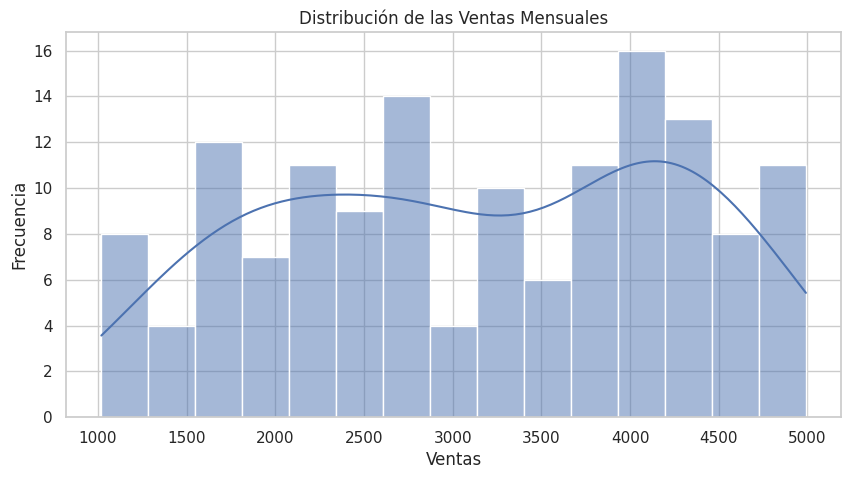

In [ ]:
# Histograma de Ventas
plt.figure(figsize=(10, 5)) # Ajustar tamaño para este gráfico específico
sns.histplot(data=df, x='Ventas', bins=15, kde=True)
plt.title('Distribución de las Ventas Mensuales')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

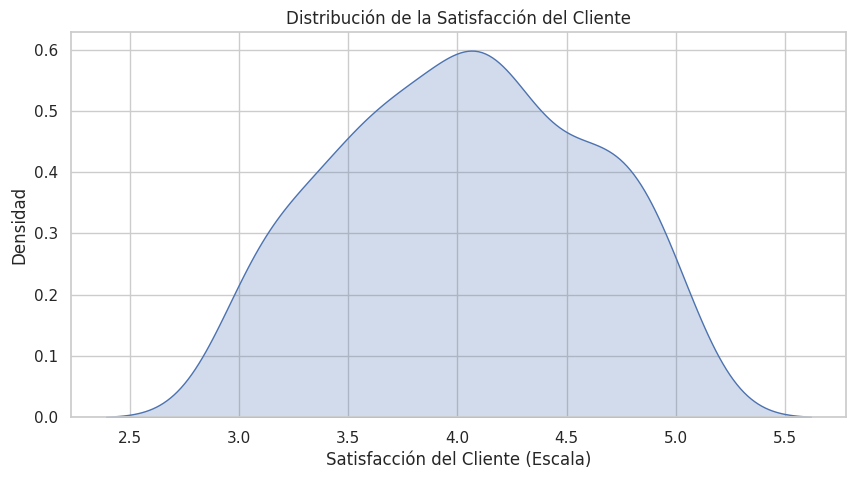

In [ ]:
# KDE plot de Satisfacción del Cliente
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='Satisfaccion_Cliente', fill=True)
plt.title('Distribución de la Satisfacción del Cliente')
plt.xlabel('Satisfacción del Cliente (Escala)')
plt.ylabel('Densidad')
plt.show()

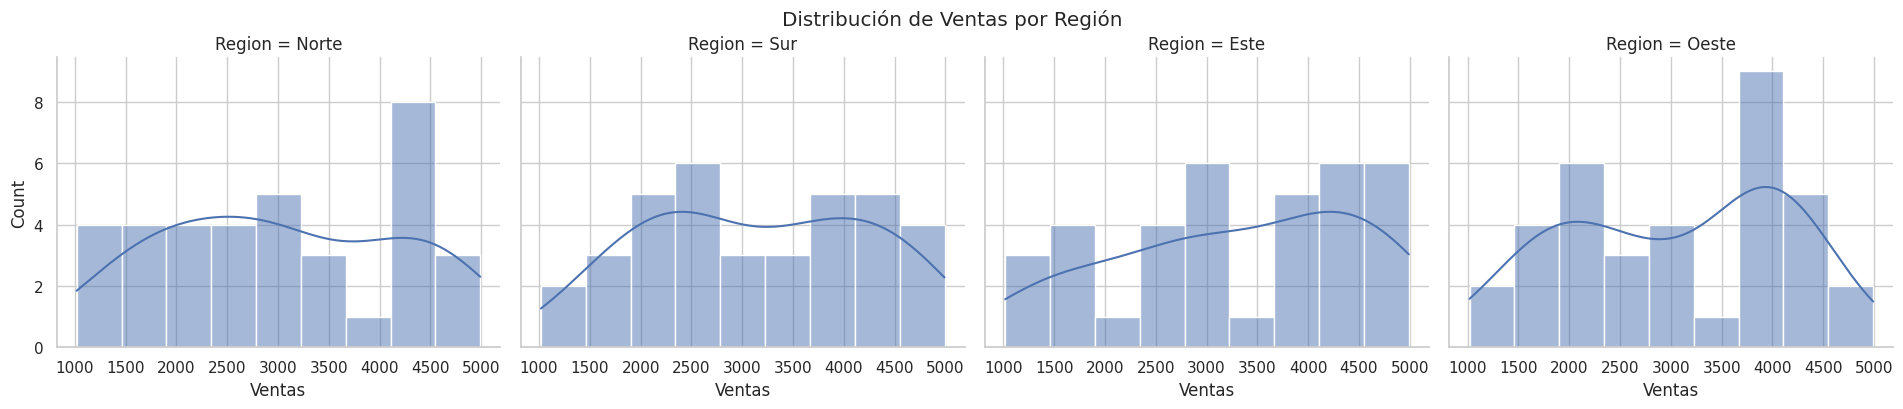

In [ ]:
# Displot: Distribución de Ventas por Región
sns.displot(data=df, x='Ventas', col='Region', kde=True, height=4, aspect=1.2)
plt.suptitle('Distribución de Ventas por Región', y=1.02) # Título general ajustado
plt.show()

## 3.2. Gráficos Categóricos (Categorical Plots)

Comparan una variable numérica a través de diferentes categorías.


* barplot: Muestra una estimación puntual (por defecto, la media) y un intervalo de confianza.
* boxplot: Muestra la distribución a través de cuartiles (caja), medianas (línea central) y outliers (puntos).
* violinplot: Combina un boxplot con un KDE plot, mostrando la forma de la distribución.
* countplot: Muestra la cuenta de observaciones en cada categoría (similar a un histograma para variables categóricas).
* catplot: Figura-nivel para gráficos categóricos, permite fácil faceting (col, row, hue, kind).


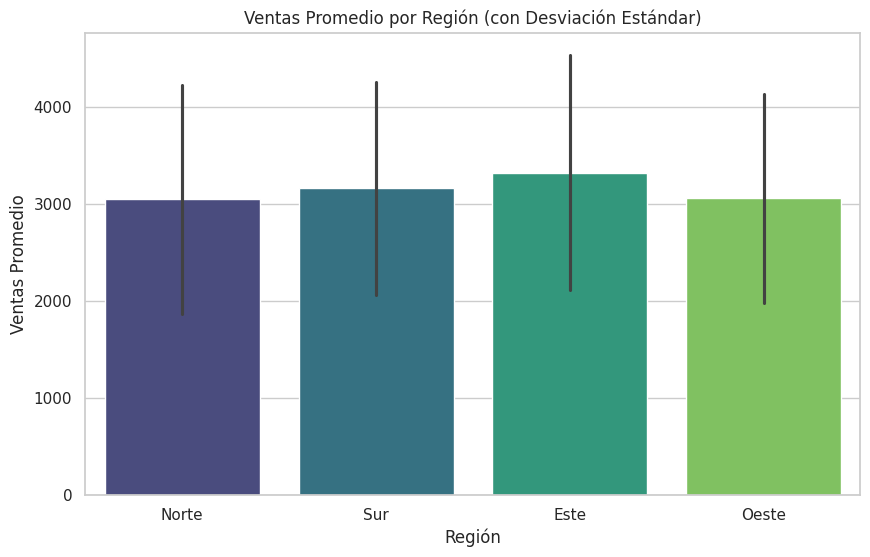

In [ ]:
# Barplot: Ventas promedio por Región
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Region', y='Ventas', ci='sd', palette='viridis') # ci='sd' muestra desviación estándar
plt.title('Ventas Promedio por Región (con Desviación Estándar)')
plt.xlabel('Región')
plt.ylabel('Ventas Promedio')
plt.show()

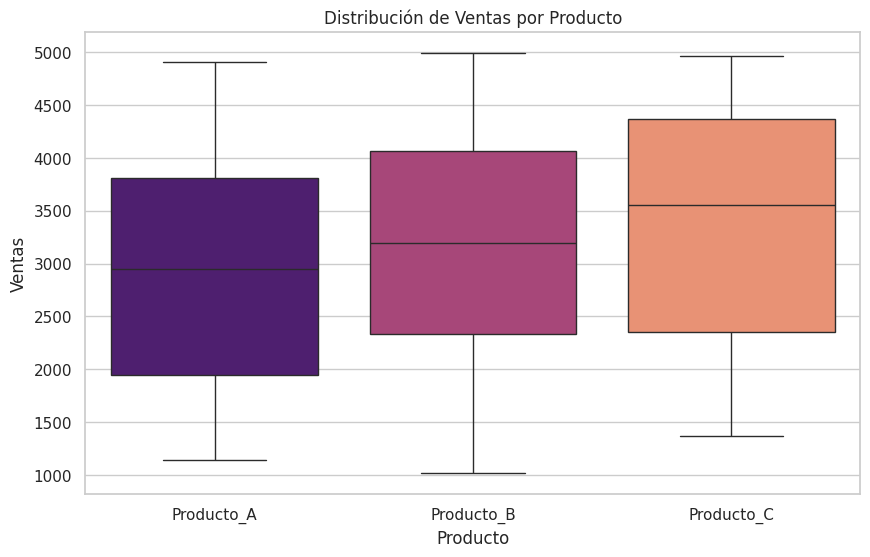

In [ ]:
# Boxplot: Distribución de Ventas por Producto
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Producto', y='Ventas', palette='magma')
plt.title('Distribución de Ventas por Producto')
plt.xlabel('Producto')
plt.ylabel('Ventas')
plt.show()

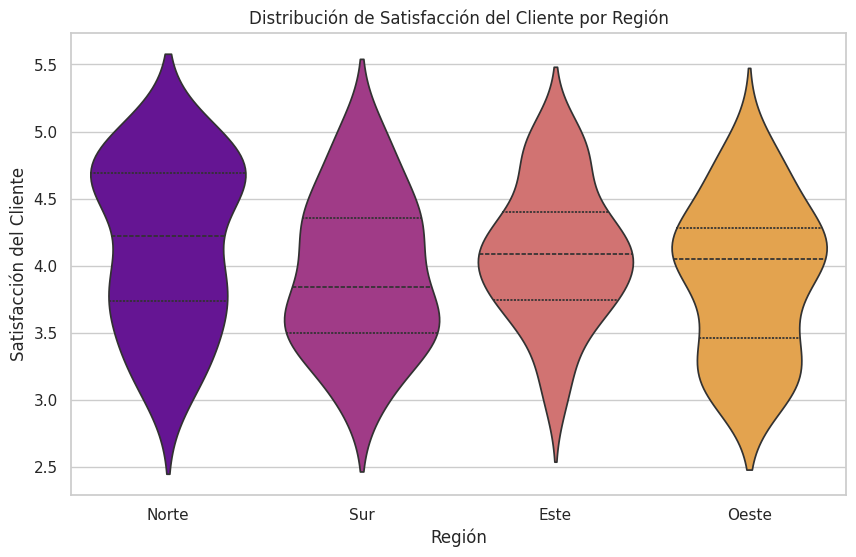

In [ ]:
# Violinplot: Distribución de Satisfacción del Cliente por Región
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Region', y='Satisfaccion_Cliente', palette='plasma', inner='quartile') # inner='quartile' muestra los cuartiles dentro
plt.title('Distribución de Satisfacción del Cliente por Región')
plt.xlabel('Región')
plt.ylabel('Satisfacción del Cliente')
plt.show()

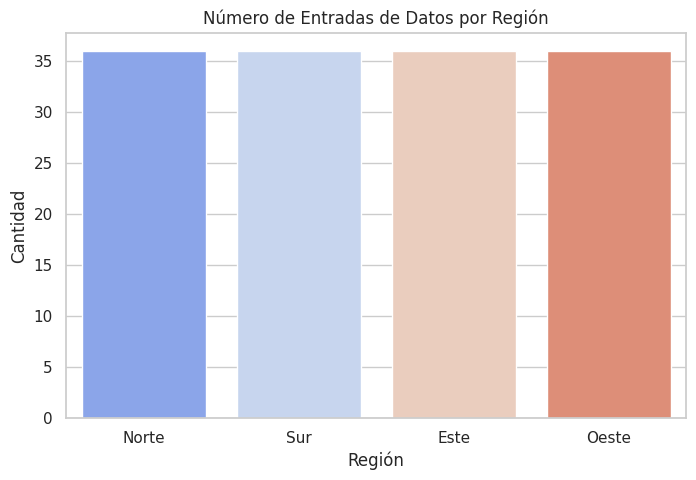

In [ ]:
# Countplot: Número de registros por Región (deberían ser iguales si los datos están completos)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Region', palette='coolwarm')
plt.title('Número de Entradas de Datos por Región')
plt.xlabel('Región')
plt.ylabel('Cantidad')
plt.show()

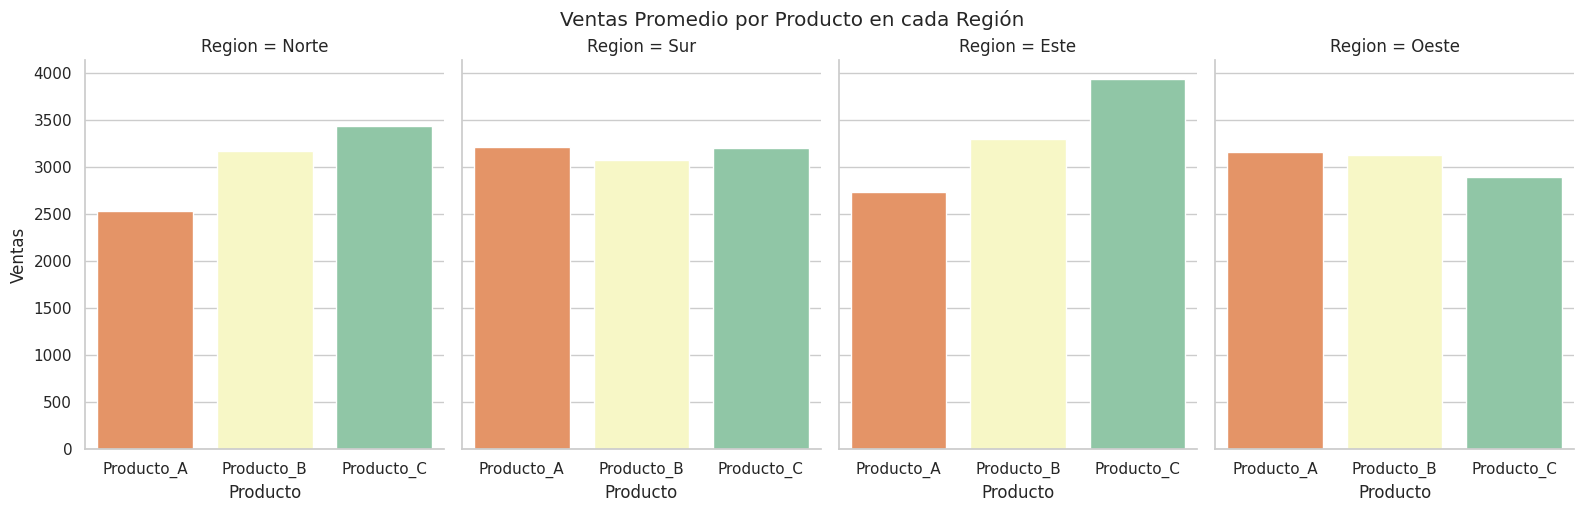

In [ ]:
# Catplot: Ventas promedio por Producto y Región
sns.catplot(data=df, x='Producto', y='Ventas', col='Region', kind='bar', height=5, aspect=0.8, palette='Spectral', ci=None) # kind='bar' especifica barplot, ci=None quita las barras de error
plt.suptitle('Ventas Promedio por Producto en cada Región', y=1.02)
plt.show()

## 3.3. Gráficos de Relación (Relational Plots)

Exploran la relación entre dos variables numéricas.

* scatterplot: Muestra la relación entre dos variables numéricas. Se puede añadir información categórica con hue, size, style.
* lineplot: Ideal para visualizar tendencias a lo largo del tiempo o de otra variable continua.
* relplot: Figura-nivel para scatterplots y lineplots, facilita la creación de subgráficos basados en categorías.

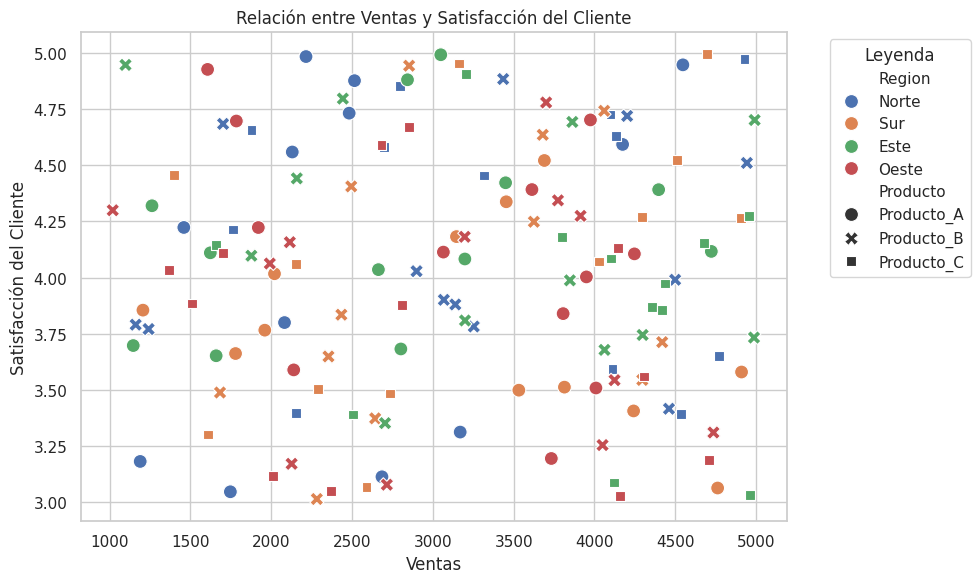

In [ ]:
# Scatterplot: Relación entre Ventas y Satisfacción del Cliente
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Ventas', y='Satisfaccion_Cliente', hue='Region', style='Producto', s=100) # s=100 aumenta tamaño de puntos
plt.title('Relación entre Ventas y Satisfacción del Cliente')
plt.xlabel('Ventas')
plt.ylabel('Satisfacción del Cliente')
plt.legend(title='Leyenda', bbox_to_anchor=(1.05, 1), loc='upper left') # Mover leyenda fuera
plt.tight_layout() # Ajustar layout para que no se solape la leyenda
plt.show()

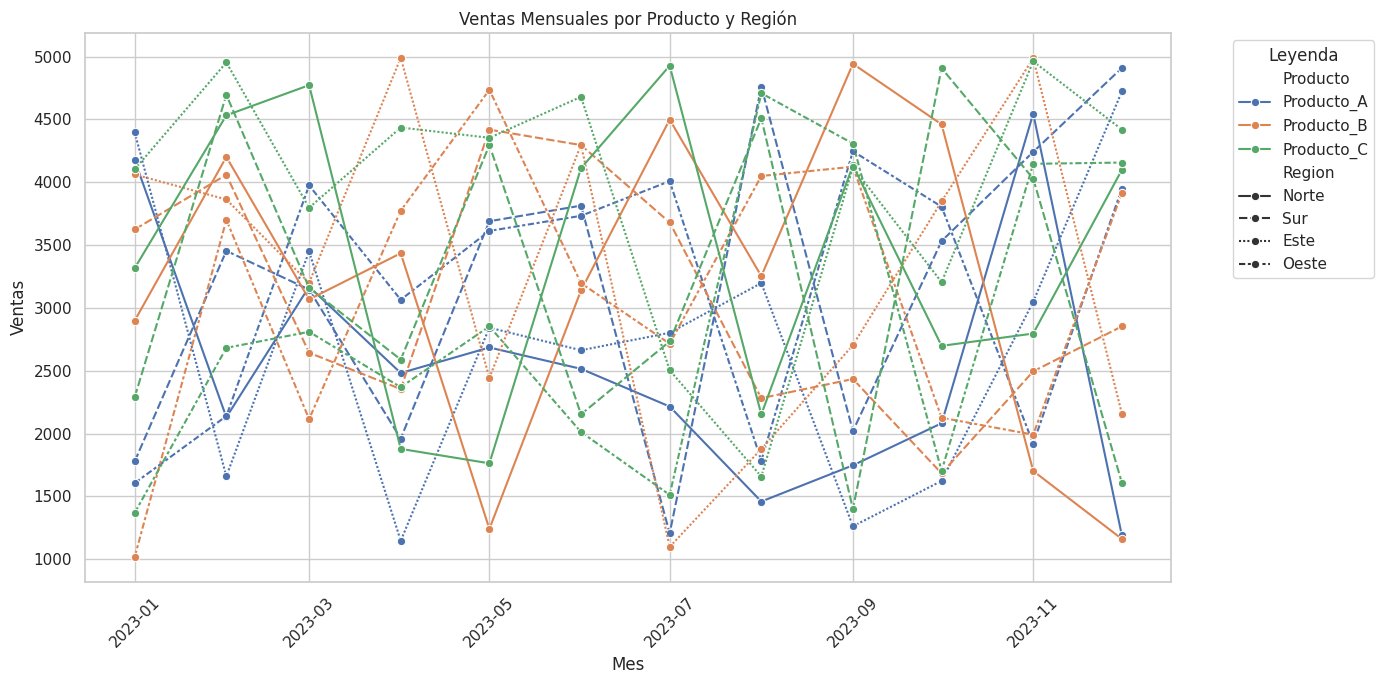

In [ ]:
# Lineplot: Ventas a lo largo del tiempo por Producto
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Mes', y='Ventas', hue='Producto', style='Region', marker='o')
plt.title('Ventas Mensuales por Producto y Región')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.xticks(rotation=45) # Rotar etiquetas eje x para legibilidad
plt.legend(title='Leyenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

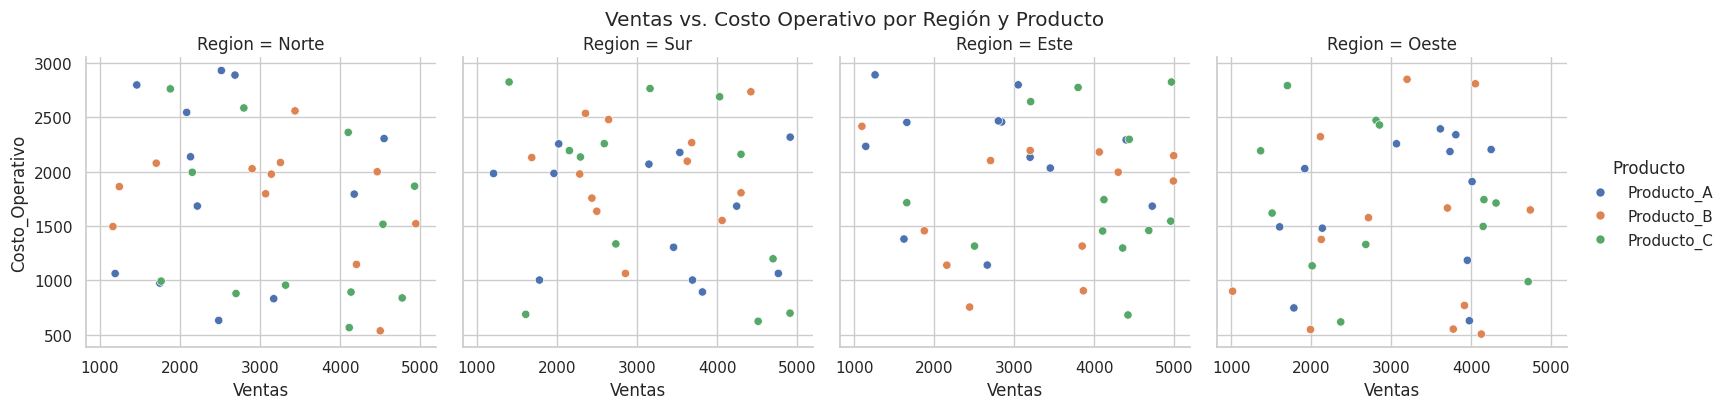

In [ ]:
# Relplot: Relación entre Ventas y Costo Operativo, separada por Región
sns.relplot(data=df, x='Ventas', y='Costo_Operativo', col='Region', hue='Producto', kind='scatter', height=4, aspect=1)
plt.suptitle('Ventas vs. Costo Operativo por Región y Producto', y=1.02)
plt.show()

Parametros importantes en seaborn:

* hue= colorea los puntos/líneas según una variable categórica.
* style= cambia el marcador/estilo de línea según una variable categórica.
* size= cambia el tamaño según una variable numérica o categórica.
* s= en scatterplot establece un tamaño fijo para los puntos.
* marker='o' en lineplot añade marcadores circulares en cada punto de datos.
* relplot con kind='scatter' crea scatterplots facetados. kind='line' crearía lineplots facetados.
* plt.legend() permite personalizar la leyenda, bbox_to_anchor y loc la posicionan.
* plt.tight_layout() ajusta los elementos del gráfico para evitar solapamientos.
* plt.xticks(rotation=45) gira las etiquetas del eje X para que no se superpongan, útil con fechas.

## 3.4. Gráficos Matriciales (Matrix Plots)

Visualizan datos matriciales, como matrices de correlación.

* heatmap: Muestra una matriz coloreando las celdas según su valor. Útil para matrices de correlación.
* clustermap: Similar a heatmap, pero reordena las filas y columnas usando algoritmos de clustering para agrupar variables similares.


In [ ]:
# Calcular la matriz de correlación solo para columnas numéricas
columnas_numericas = ['Ventas', 'Satisfaccion_Cliente', 'Costo_Operativo', 'NumeroMes']
matriz_correlacion = df[columnas_numericas].corr()

print("\nMatriz de Correlación:")
matriz_correlacion



Matriz de Correlación:


,Ventas,Satisfaccion_Cliente,Costo_Operativo,NumeroMes
Ventas,1.000000,0.005756,-0.112048,0.010325
Satisfaccion_Cliente,0.005756,1.000000,0.058612,-0.135073
Costo_Operativo,-0.112048,0.058612,1.000000,-0.016677
NumeroMes,0.010325,-0.135073,-0.016677,1.000000


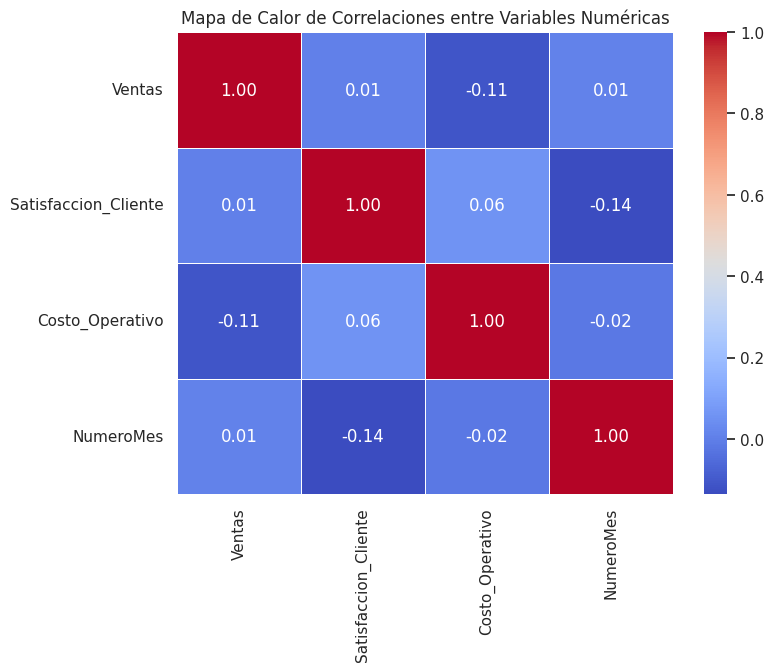

In [ ]:
# Heatmap de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# annot=True muestra los valores en las celdas
# cmap='coolwarm' define el mapa de color
# fmt=".2f" formatea los números a 2 decimales
# linewidths añade líneas entre celdas
plt.title('Mapa de Calor de Correlaciones entre Variables Numéricas')
plt.show()

# 4. Ejercicio Practico

* Consigna: Diseñar un plan de visualización que permita al equipo directivo analizar y comprender mejor los datos, enfocándose en las siguientes preguntas clave:

1. Ventas y Regiones: ¿Cómo se comparan las ventas de los diferentes productos en las cuatro regiones a lo largo del tiempo? ¿Hay alguna región que se destaque por un rendimiento superior o inferior?
2. Satisfacción del Cliente: ¿Existe alguna relación entre las ventas de un producto y la satisfacción del cliente? ¿Cómo varía esta relación entre las diferentes regiones?
3. Costos Operativos: ¿Qué regiones tienen los costos operativos más altos? ¿Cómo se comparan estos costos con las ventas y la satisfacción del cliente?


## Respuesta a Pregunta 1: Ventas y Regiones

### Plan de Visualización:
* Usar un `lineplot` para mostrar la evolución de las ventas (Ventas) a lo largo del tiempo (Mes) para cada Producto, separando las líneas por Region. Esto muestra tendencias y comparaciones directas.
* Usar un `barplot` o boxplot para comparar las ventas totales o la distribución de ventas por Region y Producto.

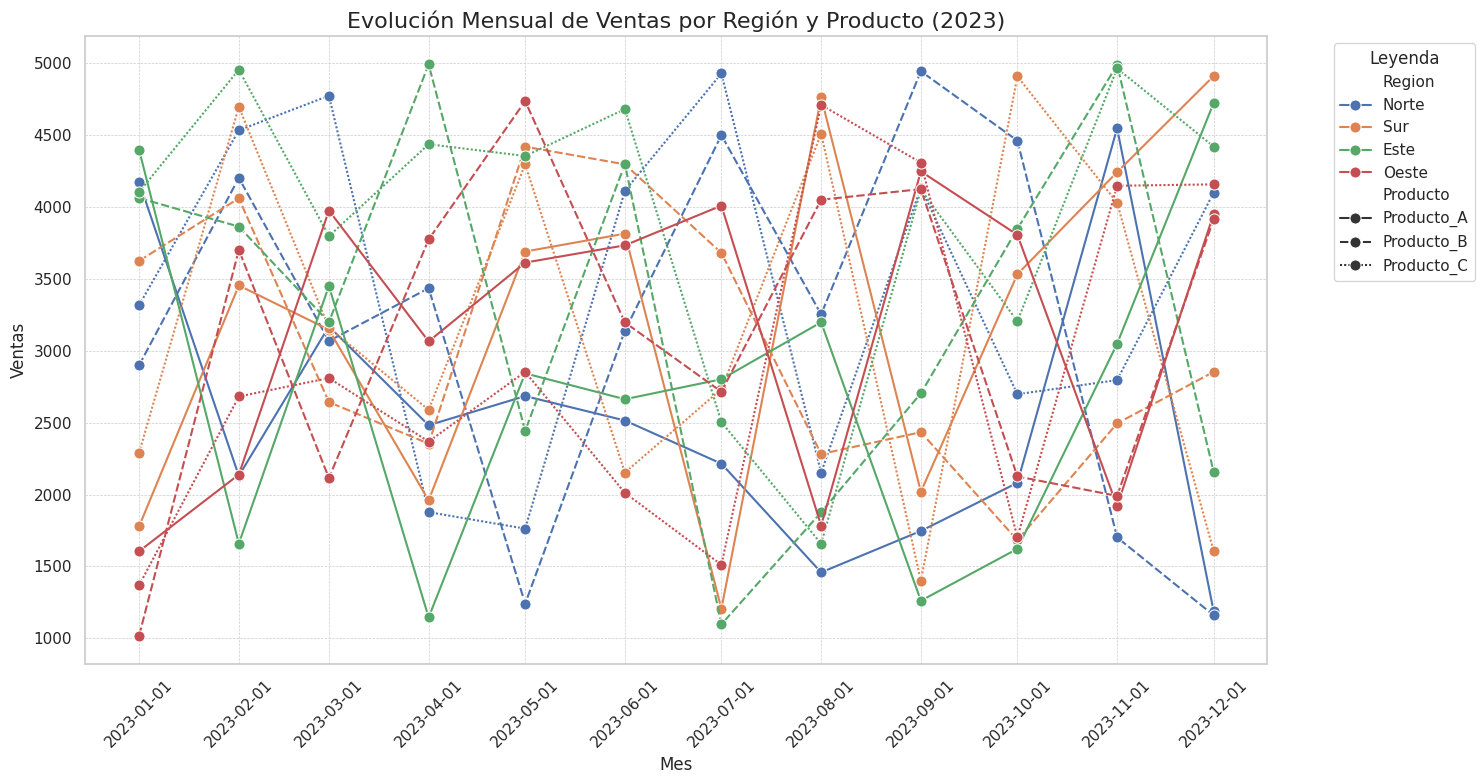

In [ ]:
# 1.1: Evolución de Ventas por Producto y Región a lo largo del tiempo
plt.figure(figsize=(15, 8))
sns.lineplot(data=df, x='Mes', y='Ventas', hue='Region', style='Producto', marker='o', markersize=8)
plt.title('Evolución Mensual de Ventas por Región y Producto (2023)', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas', fontsize=12)
plt.legend(title='Leyenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df['Mes'].unique(), rotation=45) # Asegurar que todos los meses se muestren
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

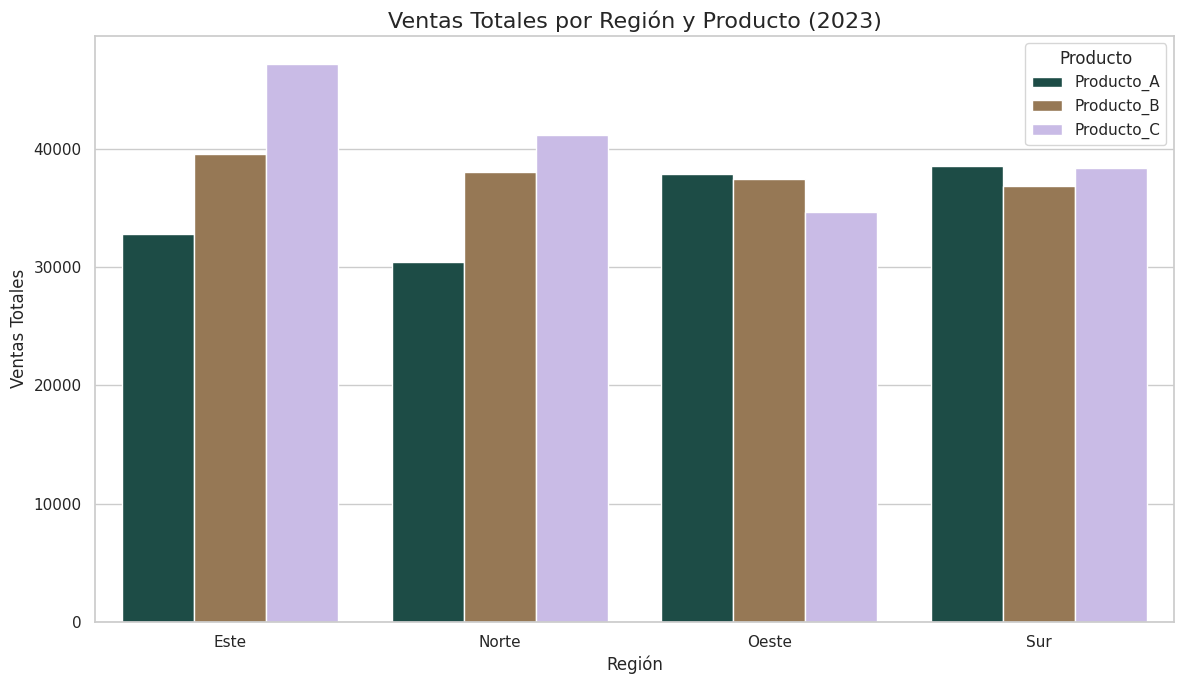

In [ ]:
# 1.2: Comparación de Ventas Totales por Región y Producto
ventas_totales = df.groupby(['Region', 'Producto'])['Ventas'].sum().reset_index()

plt.figure(figsize=(12, 7))
sns.barplot(data=ventas_totales, x='Region', y='Ventas', hue='Producto', palette='cubehelix')
plt.title('Ventas Totales por Región y Producto (2023)', fontsize=16)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.legend(title='Producto')
plt.tight_layout()
plt.show()

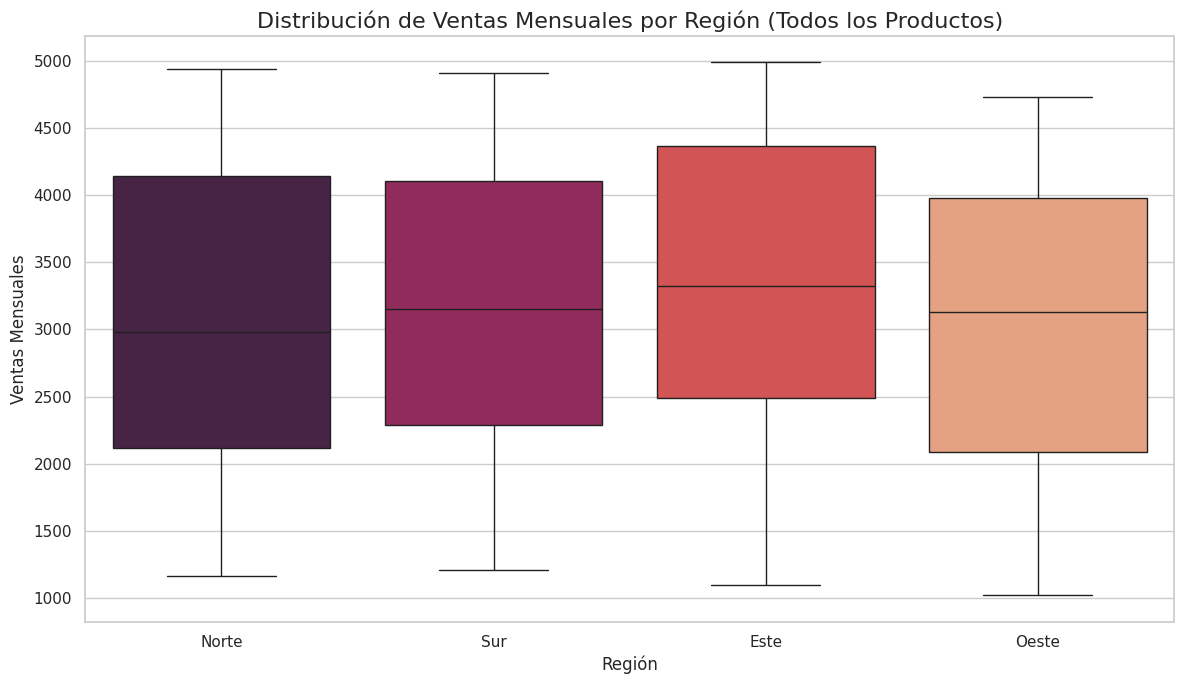

In [ ]:
# 1.3: Comparación de Distribución de Ventas por Región (agrupando productos)
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Region', y='Ventas', palette='rocket')
plt.title('Distribución de Ventas Mensuales por Región (Todos los Productos)', fontsize=16)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Ventas Mensuales', fontsize=12)
plt.tight_layout()
plt.show()

### Análisis (Pregunta 1):

* El lineplot muestra las fluctuaciones mensuales. Se pueden observar picos o valles específicos para ciertos productos en ciertas regiones. Por ejemplo, ¿algún producto tuvo un diciembre particularmente bueno/malo en una región específica?
* El barplot de ventas totales permite una comparación rápida del rendimiento acumulado. ¿Qué región vendió más en total? ¿Qué producto es el más vendido en cada región?
* El boxplot muestra no solo la media (implícita), sino también la mediana, el rango intercuartílico y posibles outliers en las ventas mensuales por región. Una caja más alta indica mayor variabilidad en las ventas mensuales. ¿Alguna región tiene ventas consistentemente altas (mediana alta, caja compacta)? ¿Alguna tiene ventas muy variables (caja grande)?


## Respuesta a Pregunta 2: Satisfacción del Cliente

### Plan de Visualización:
* Usar scatterplot para visualizar la relación entre Ventas y Satisfaccion_Cliente. Colorear los puntos por Region (hue='Region') para ver si la relación difiere regionalmente.
* Se puede usar relplot con kind='scatter' y col='Region' para separar claramente la visualización por región.
* Opcionalmente, usar lmplot (que utiliza regplot internamente) para añadir una línea de regresión lineal y ver la tendencia general de la relación en cada región.

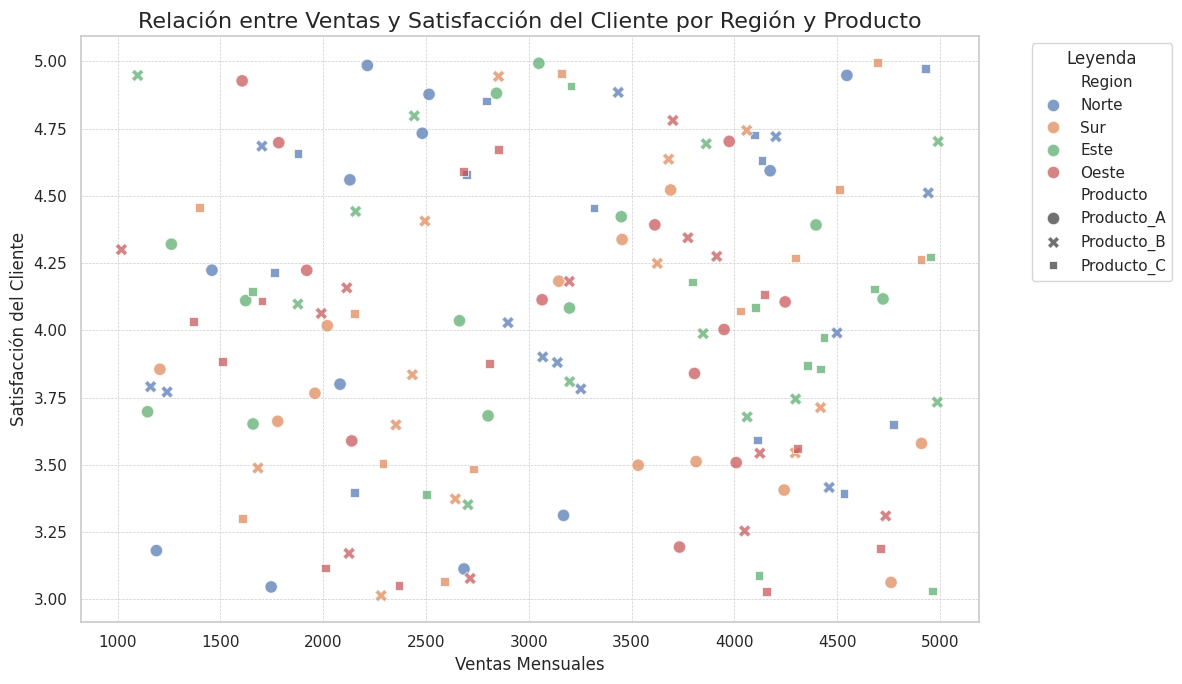

In [ ]:
# 2.1: Scatterplot de Ventas vs Satisfacción, coloreado por Región
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Ventas', y='Satisfaccion_Cliente', hue='Region', style='Producto', s=80, alpha=0.7)
plt.title('Relación entre Ventas y Satisfacción del Cliente por Región y Producto', fontsize=16)
plt.xlabel('Ventas Mensuales', fontsize=12)
plt.ylabel('Satisfacción del Cliente', fontsize=12)
plt.legend(title='Leyenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

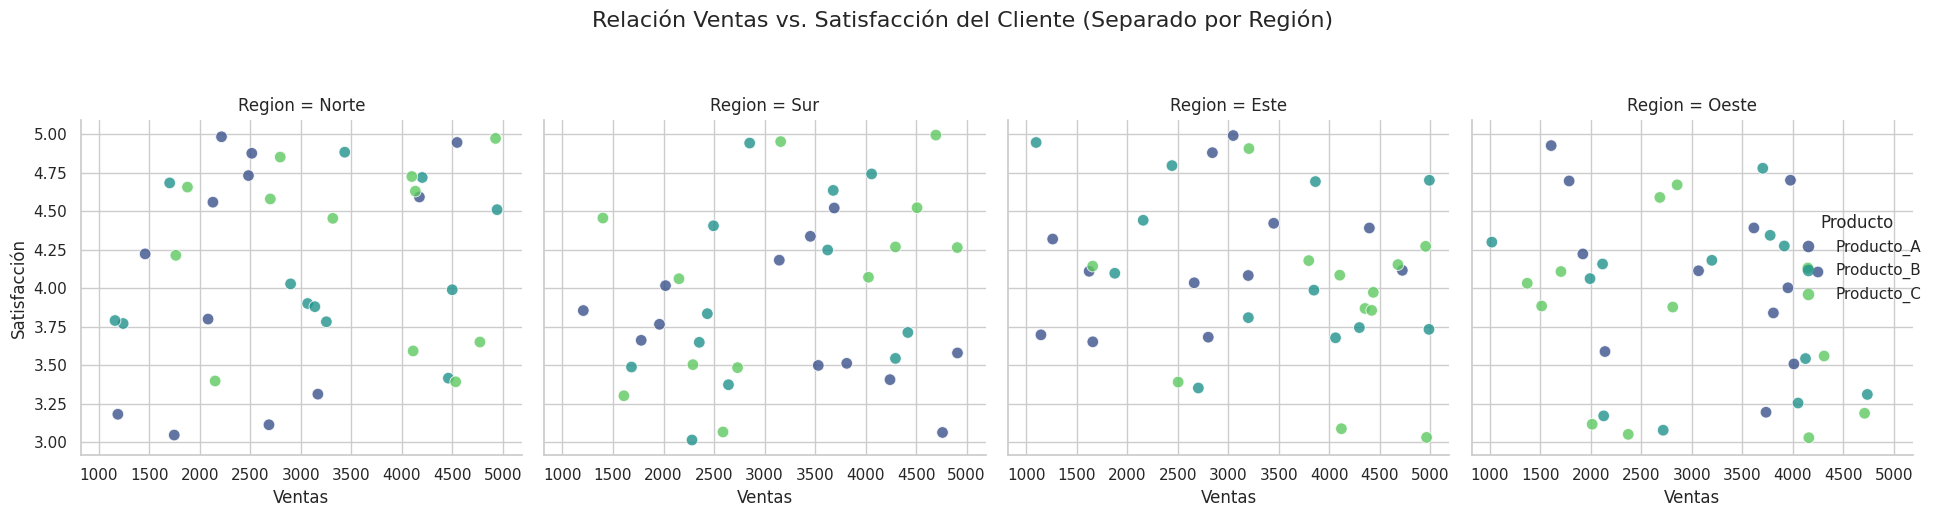

In [ ]:
# 2.2: Relplot para separar la relación por Región
sns.relplot(data=df, x='Ventas', y='Satisfaccion_Cliente', hue='Producto', col='Region', kind='scatter',
            height=5, aspect=0.9, s=70, alpha=0.8, palette='viridis')
plt.suptitle('Relación Ventas vs. Satisfacción del Cliente (Separado por Región)', y=1.03, fontsize=16)
# Ajustar etiquetas individualmente si es necesario (ejemplo para el primer subplot)
plt.gcf().axes[0].set_xlabel("Ventas")
plt.gcf().axes[0].set_ylabel("Satisfacción")
plt.tight_layout(rect=[0, 0, 1, 0.97]) # Ajustar para que el suptitle no se solape
plt.show()

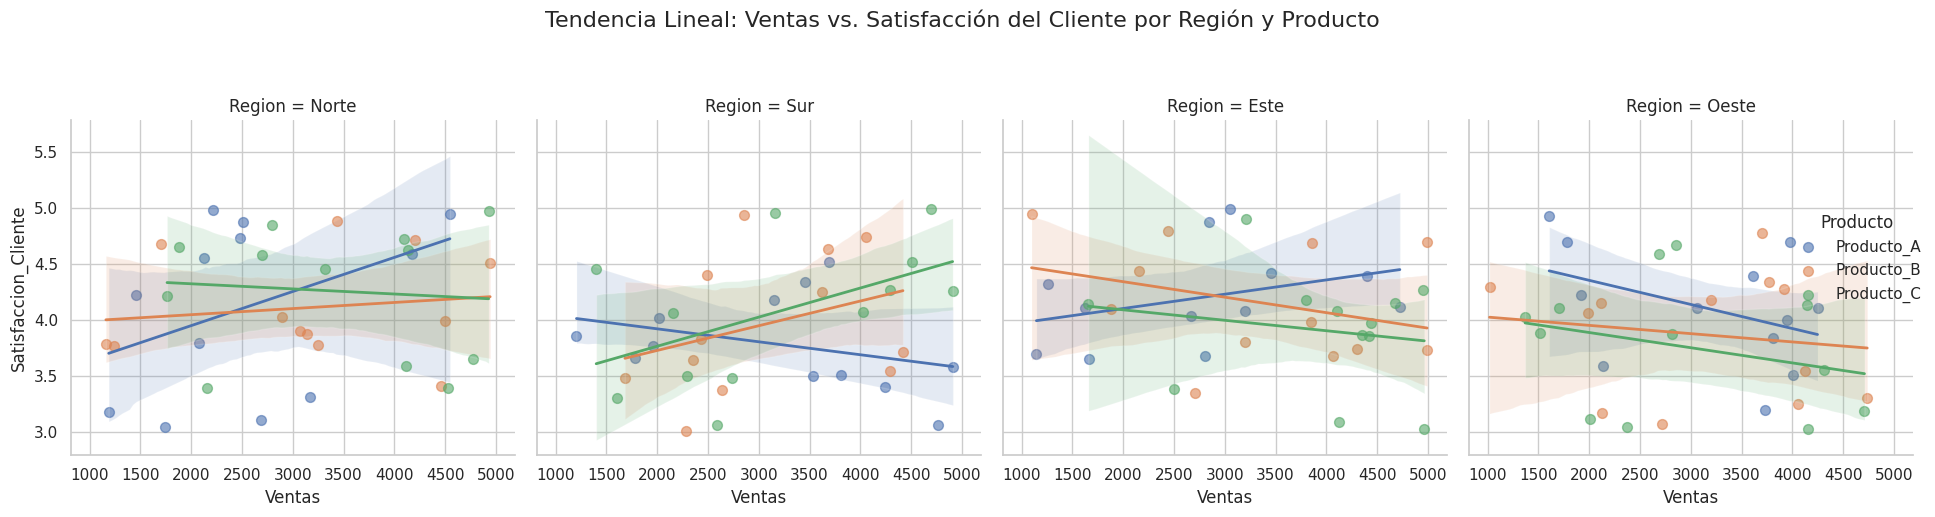

In [ ]:
# 2.3 (Opcional): lmplot para ver tendencias con regresión lineal
sns.lmplot(data=df, x='Ventas', y='Satisfaccion_Cliente', col='Region', hue='Producto',
           height=5, aspect=0.9, scatter_kws={'alpha':0.6, 's':50}, line_kws={'lw':2})
plt.suptitle('Tendencia Lineal: Ventas vs. Satisfacción del Cliente por Región y Producto', y=1.03, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### Análisis (Pregunta 2):

* Los scatterplots (generales o facetados) permiten observar visualmente si existe un patrón. ¿Tienden los meses/productos con mayores ventas a tener mayor o menor satisfacción? ¿O no hay una relación clara (puntos dispersos aleatoriamente)?
* La separación por región (hue o col) es clave: ¿La relación (o falta de ella) es consistente en todas las regiones, o alguna región muestra un patrón diferente? Por ejemplo, ¿en la región 'Norte' una mayor venta se asocia con mayor satisfacción, mientras que en 'Sur' no?
* El lmplot ayuda a cuantificar la tendencia. Una línea ascendente sugiere una correlación positiva (más ventas, más satisfacción), una descendente sugiere correlación negativa, y una línea casi horizontal sugiere poca o ninguna correlación lineal. La sombra alrededor de la línea indica la incertidumbre de la regresión.

## Respuesta a Pregunta 3: Costos Operativos

### Plan de Visualización:

* Usar boxplot o violinplot para comparar la distribución del Costo_Operativo entre las diferentes Region.
* Usar scatterplot (o relplot) para visualizar la relación entre Costo_Operativo y Ventas, coloreando por Region.
* Usar scatterplot (o relplot) para visualizar la relación entre Costo_Operativo y Satisfaccion_Cliente, coloreando por Region.
* Un pairplot podría ser útil para ver todas las relaciones entre Ventas, Satisfacción y Costo Operativo a la vez, separadas por región.

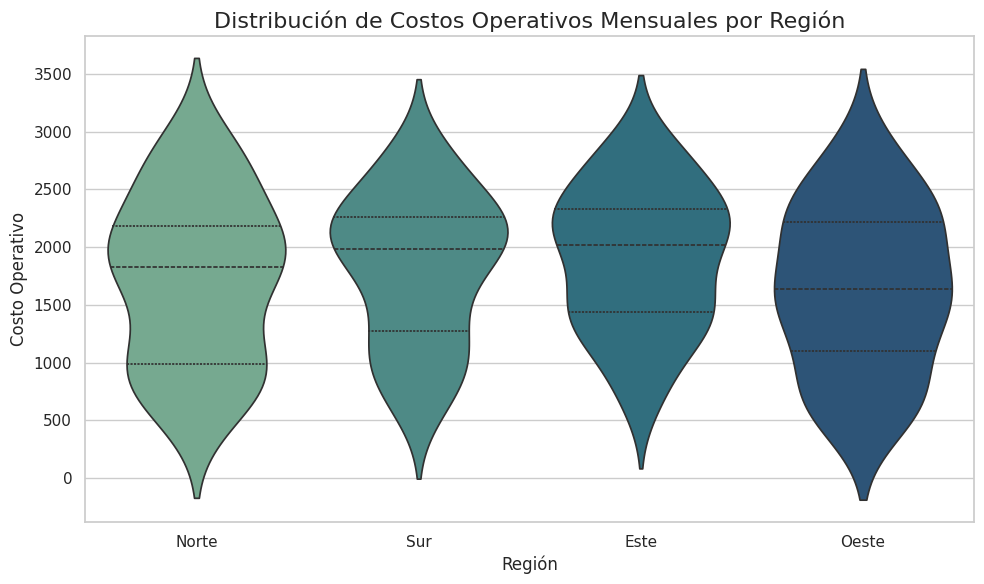

In [ ]:
# 3.1: Distribución de Costos Operativos por Región
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Region', y='Costo_Operativo', palette='crest', inner='quartile')
plt.title('Distribución de Costos Operativos Mensuales por Región', fontsize=16)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Costo Operativo', fontsize=12)
plt.tight_layout()
plt.show()

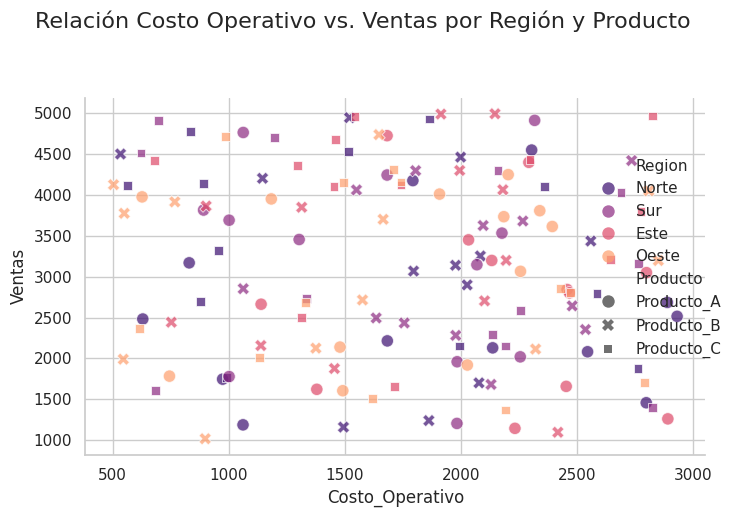

In [ ]:
# 3.2: Relación entre Costo Operativo y Ventas por Región
sns.relplot(data=df, x='Costo_Operativo', y='Ventas', hue='Region', style='Producto',
            kind='scatter', height=5, aspect=1.2, s=80, alpha=0.7, palette='magma')
plt.suptitle('Relación Costo Operativo vs. Ventas por Región y Producto', y=1.03, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

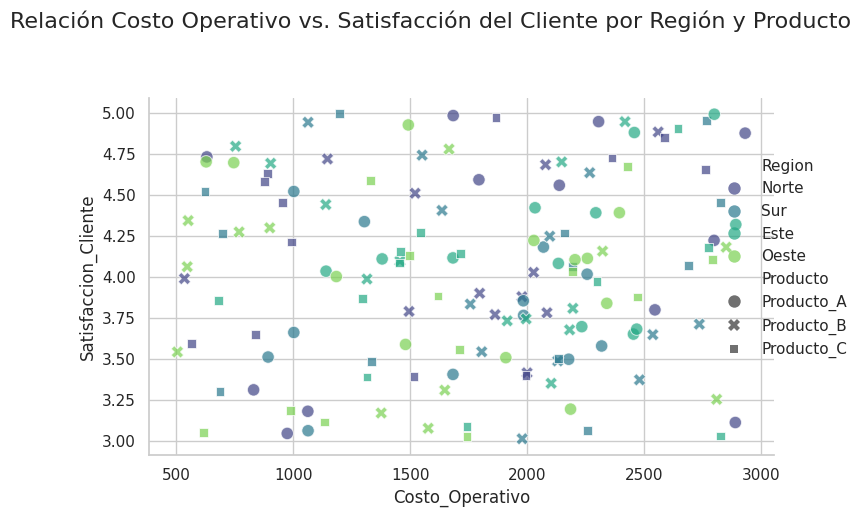

In [ ]:
# 3.3: Relación entre Costo Operativo y Satisfacción del Cliente por Región
sns.relplot(data=df, x='Costo_Operativo', y='Satisfaccion_Cliente', hue='Region', style='Producto',
            kind='scatter', height=5, aspect=1.2, s=80, alpha=0.7, palette='viridis')
plt.suptitle('Relación Costo Operativo vs. Satisfacción del Cliente por Región y Producto', y=1.03, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

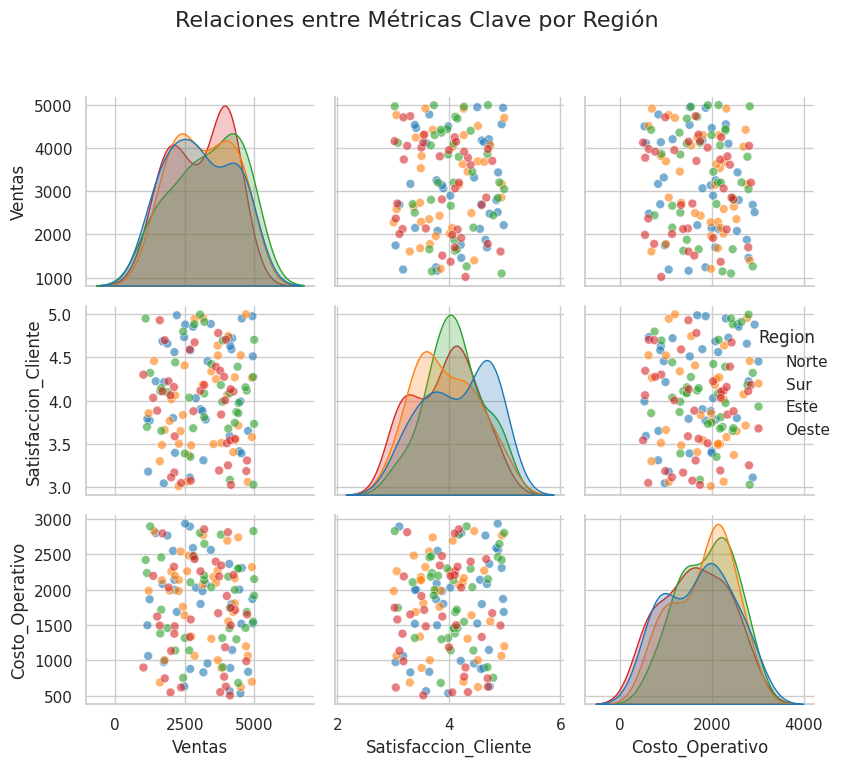

In [ ]:
# Pairplot para visión general
# Seleccionar solo las columnas numéricas relevantes y la región para el hue
columnas_pairplot = ['Ventas', 'Satisfaccion_Cliente', 'Costo_Operativo', 'Region']
sns.pairplot(df[columnas_pairplot], hue='Region', palette='tab10', plot_kws={'alpha':0.6, 's':40}, diag_kind='kde')
plt.suptitle('Relaciones entre Métricas Clave por Región', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### Análisis (Pregunta 3):

* El boxplot (o violinplot) responde directamente qué regiones tienen costos operativos más altos o más bajos en promedio (mediana) y cuál tiene más variabilidad (altura de la caja/violín).
* Los scatterplots Costo_Operativo vs. Ventas y Costo_Operativo vs. Satisfaccion_Cliente, especialmente separados por región, son cruciales. ¿Las regiones con mayores costos operativos también tienen mayores ventas? ¿O hay regiones que gastan mucho pero venden poco? ¿Los altos costos operativos afectan negativamente la satisfacción del cliente, o no hay relación aparente? ¿Varían estos patrones entre regiones?
* El pairplot ofrece una vista consolidada. Permite ver rápidamente todas las relaciones dos a dos y la distribución de cada variable (en la diagonal), diferenciando por región. Es denso, pero muy informativo para una visión general.
